## Power Dips

In the original data, the power seems to dip to 0 at night. Because this trend is not reflected in the grid power consumed, the PV created, or the battery power used, it is presumed that this is because of some external factor - such as perhaps wifi turning off at night.

Starting in the first timestep (746) we will copy all the na and 0 values from the original data over to the new data.

In [ ]:
import pandas as pd
## Read in dirty data
df_dirty = pd.read_parquet("01_preprocess/building_real__all_devices__2023_dirty.parquet")
df_dirty = df_dirty.reset_index(drop=True) # just use a 0-based index
df_clean = pd.read_csv("00_raw/baseline_Building_1.csv")
df_clean = df_clean.reset_index(drop=True)  # just use a 0-based index
df_dirty.head()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_cooling_set_point,indoor_dry_bulb_temperature_heating_set_point,hvac_mode
0,1,1,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
1,1,2,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
2,1,3,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
3,1,4,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
4,1,5,6,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0


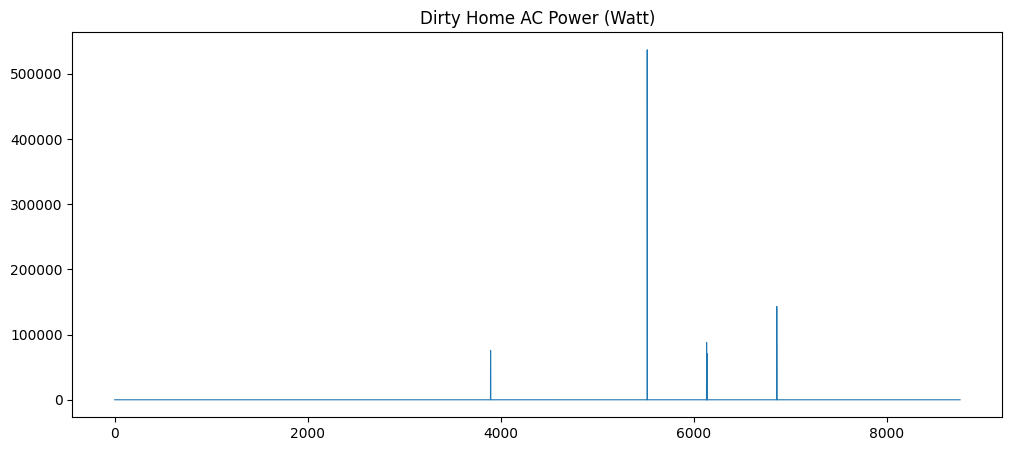

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df_dirty['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Dirty Home AC Power (Watt)')
plt.show()

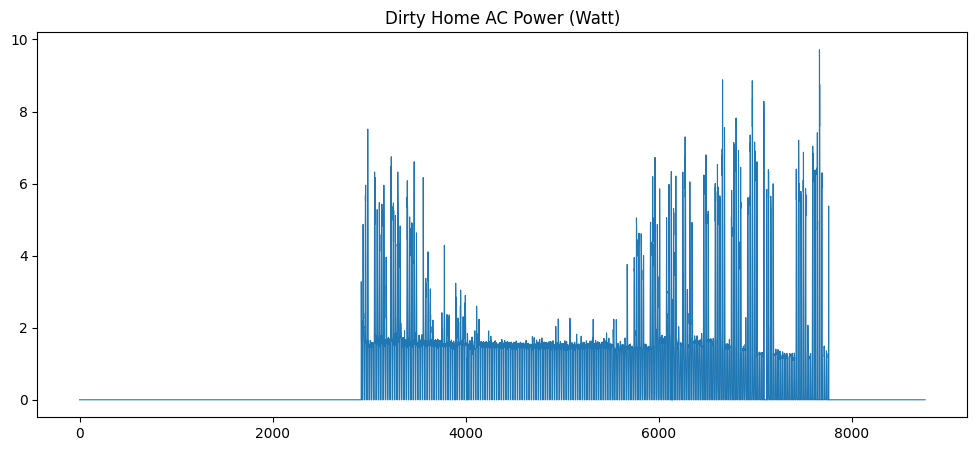

In [3]:
# replace outliers (we want dirty data, but not that dirty; yet!)
outlier_mask = df_dirty["non_shiftable_load"] > 10000
df_dirty = df_dirty.mask(outlier_mask)
df_dirty['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Dirty Home AC Power (Watt)')
plt.show()

In [4]:
df_dirty.shape

(8760, 16)

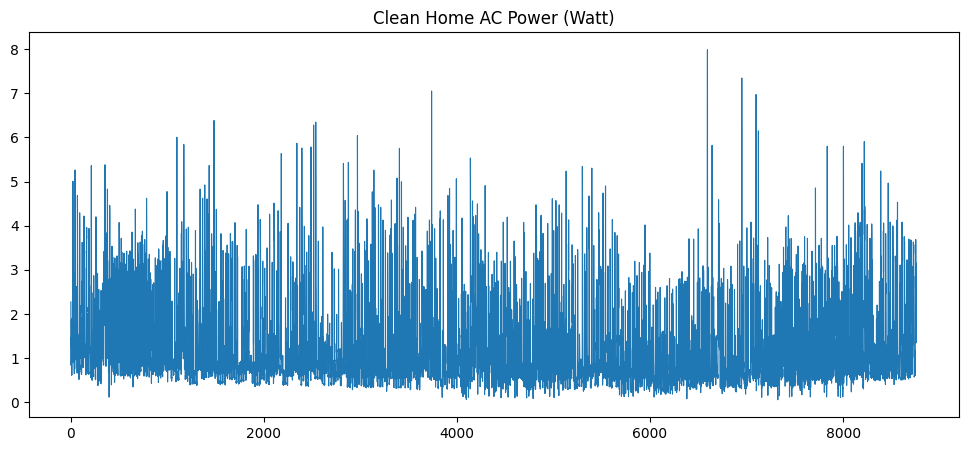

In [5]:
df_clean['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Clean Home AC Power (Watt)')
plt.show()

In [6]:
df_clean.shape

(8760, 12)

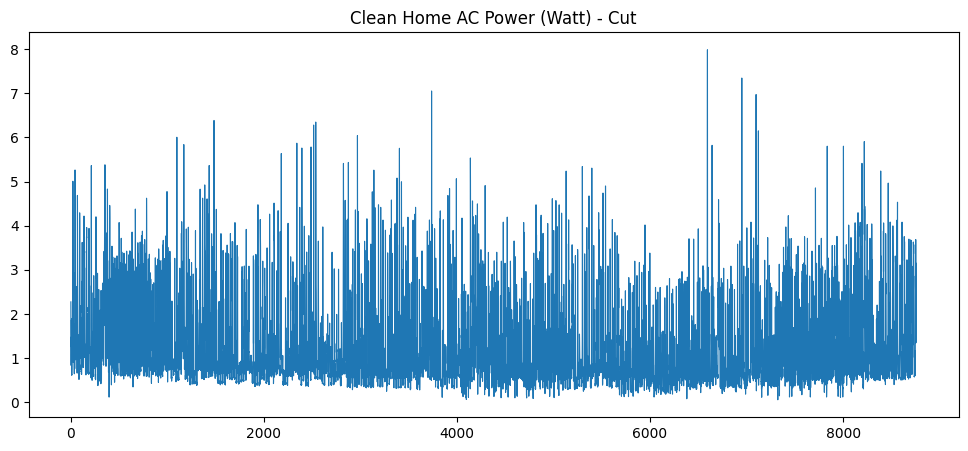

In [7]:
from utils.timestep import Timestep
df_clean_cut = df_clean[Timestep.start_copy:Timestep.end_copy].copy()
df_clean_cut['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Clean Home AC Power (Watt) - Cut')
plt.show()

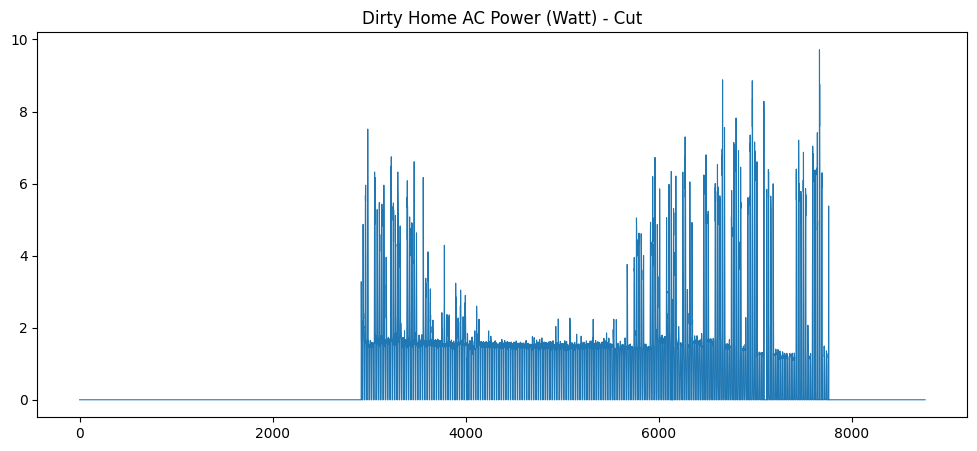

In [8]:
df_dirty_cut = df_dirty[Timestep.start_copy:Timestep.end_copy].copy()

df_dirty_cut['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Dirty Home AC Power (Watt) - Cut')
plt.show()

In [9]:
mask_dirty = df_dirty_cut["non_shiftable_load"].isna() | (df_dirty_cut["non_shiftable_load"] == 0)
print("na or 0 values", (mask_dirty == True).sum())
print("values with data", (mask_dirty == False).sum())

na or 0 values 5784
values with data 2976


In [10]:
df_clean_cut["non_shiftable_load"] = df_clean_cut["non_shiftable_load"].mask(mask_dirty)


In [11]:
df_clean_cut["non_shiftable_load"].isna().sum()

5784

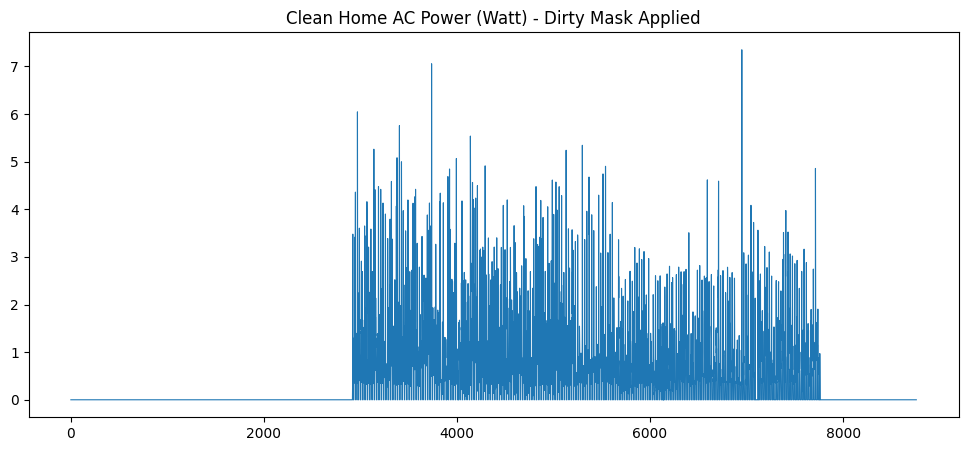

In [12]:
df_clean_cut['non_shiftable_load'].fillna(0.0).plot(figsize=(12, 5), linewidth=0.8)
plt.title('Clean Home AC Power (Watt) - Dirty Mask Applied')
plt.show()

In [13]:
df_clean_cut.fillna(0.0).to_csv("03_clean/Building_01_dirty_01_power_dips.csv", index=False)